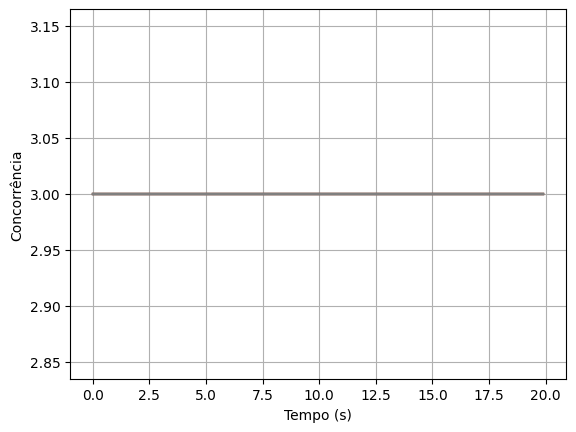

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def rhot(t, lambd, gamma0):
  rho = np.array([[0.5,0.5],[0.5,0.5]])
  d = np.emath.sqrt(2 * gamma0 * lambd - lambd**2)
  Pt = np.e**(-lambd*t) * (np.cos(d*t/2) + (lambd/d) * np.sin(d*t/2))**2
  gammat = (1 - Pt)
  E0 = np.array([1,0],[0,np.sqrt(1-Pt)])
  E1 = np.array([0,0],[0,np.sqrt(Pt)])
  rhot = (np.tensordot(E0, np.tensordot(rho,E0.conj().T, axes=([1],[1])), axes=([1],[1])) + (np.tensordot(E1, np.tensordot(rho,E1.conj().T, axes=([1],[1])), axes=([1],[1]))))
  return(rhot)

def conc(t, lambd, gamma0):
  sigmay = np.array([[0, -1j], [1j, 0]])
  Tsigmay = np.kron(sigmay, sigmay)
  EstBell = np.array([[0.5, 0, 0, 0.5],
                    [0, 0, 0, 0],
                    [0, 0, 0, 0],
                    [0.5, 0, 0, 0.5]])
  d = np.emath.sqrt(2 * gamma0 * lambd - lambd**2)
  Pt = np.e**(-lambd*t) * (np.cos(d*t/2) + (lambd/d) * np.sin(d*t/2))**2
  gammat = (1 - Pt)
  E0 = np.array([[1, 0], [0, np.emath.sqrt(1-gammat)]])
  E1 = np.array([[0, 0], [0, np.emath.sqrt(gammat)]])

  M0 = np.kron(E0, np.identity(2))
  M1 = np.kron(E1, np.identity(2))
  rhot2 = (
    np.tensordot(M0, np.tensordot(EstBell, M0.conj().T, axes=([1],[1])), axes=([1],[1])) +
    np.tensordot(M1, np.tensordot(EstBell, M1.conj().T, axes=([1],[1])), axes=([1],[1]))
)

  rhotilda = np.tensordot(Tsigmay, np.tensordot(np.conj(rhot2), Tsigmay, axes=1), axes=1)

  n = np.linalg.eigvals(rhotilda)
  raizn= np.emath.sqrt(n)
  maior = max(raizn)
  c = sum(max(0, maior - x) for x in raizn if x != maior)
  return c if c > 0 else 0

tempo = np.arange(0, 20, 0.1)
vlambda0 = np.arange(0.1, 1, 0.1)
vlambda1 = np.arange(1.1, 2, 0.1)
vlambdatotal = np.concatenate((vlambda0, vlambda1))
Result_C_Lambda = [[] for _ in vlambdatotal]

for t in tempo:
    for i, lambd in enumerate(vlambdatotal):
        Conc = conc(t, lambd, 1)
        Result_C_Lambda[i].append(Conc)
for i, lambd in enumerate(vlambdatotal):
    plt.plot(tempo, Result_C_Lambda[i], label=f'lambd = {lambd}')

plt.xlabel('Tempo (s)')
plt.ylabel('Concorrência')
plt.grid(True)
plt.show()
